In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv("Loan_Predication.csv")
df.shape

(614, 13)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [4]:
df=pd.read_csv("Loan_Predication.csv")
df.shape

(614, 13)

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#EDA

In [7]:
df["Loan_Status"].value_counts()

,count
Loan_Status,
Y,422
N,192


In [8]:
df["Gender"].value_counts()

,count
Gender,
Male,489
Female,112


In [9]:
df["Married"].value_counts()

,count
Married,
Yes,398
No,213


In [10]:
df["Dependents"].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


3+ will cause an issue so we will trat this column as a categorical

<Axes: xlabel='Education'>

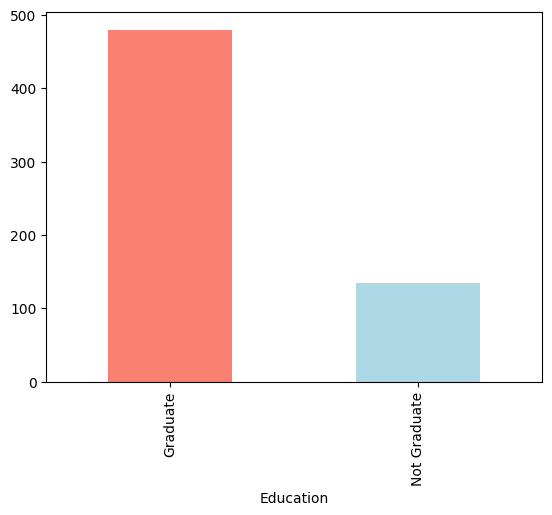

In [11]:
df.Education.value_counts().plot(kind="bar",color=["salmon","lightblue"])

<Axes: xlabel='Self_Employed'>

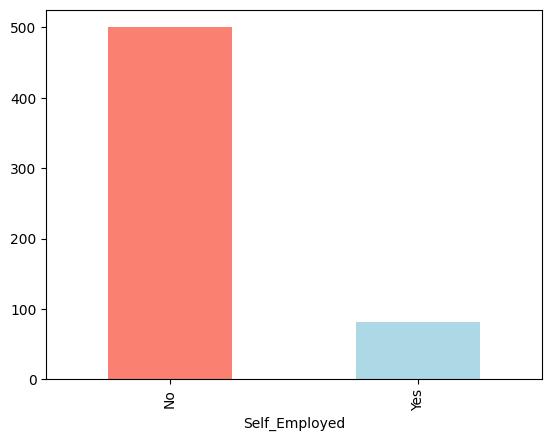

In [12]:
df.Self_Employed.value_counts().plot(kind="bar",color=["salmon","lightblue"])

<Axes: ylabel='Frequency'>

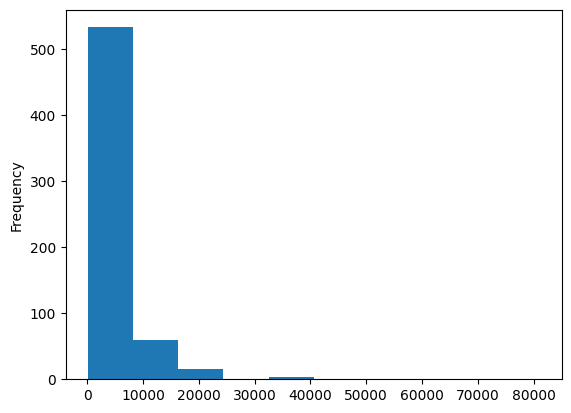

In [13]:
df.ApplicantIncome.plot(kind="hist")

<Axes: ylabel='Frequency'>

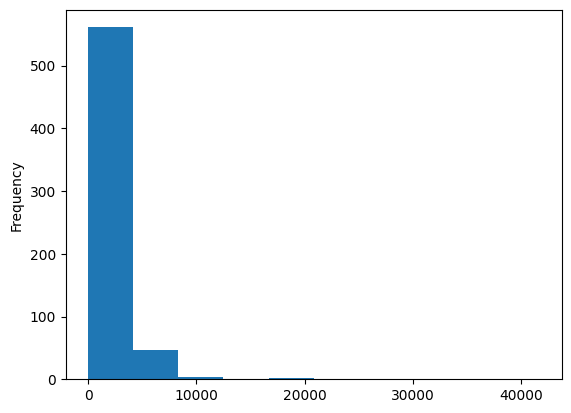

In [14]:
df.CoapplicantIncome.plot(kind="hist")

In [15]:
df["LoanAmount"].value_counts()

,count
LoanAmount,
120.0,20
110.0,17
100.0,15
187.0,12
160.0,12
...,...
292.0,1
142.0,1
350.0,1


<Axes: ylabel='Frequency'>

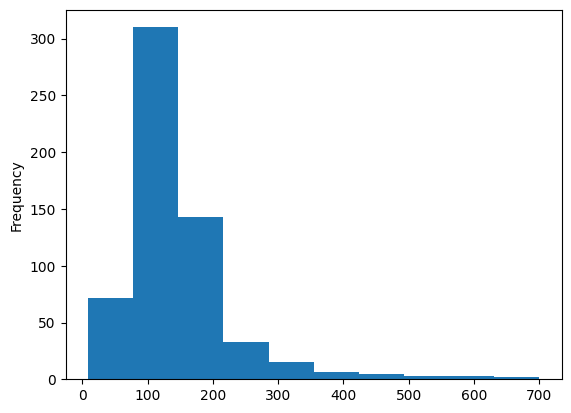

In [16]:
df.LoanAmount.plot(kind="hist")

In [17]:
df["Loan_Amount_Term"].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


In [18]:
df["Credit_History"].value_counts()

,count
Credit_History,
1.0,475
0.0,89


<Axes: xlabel='Property_Area'>

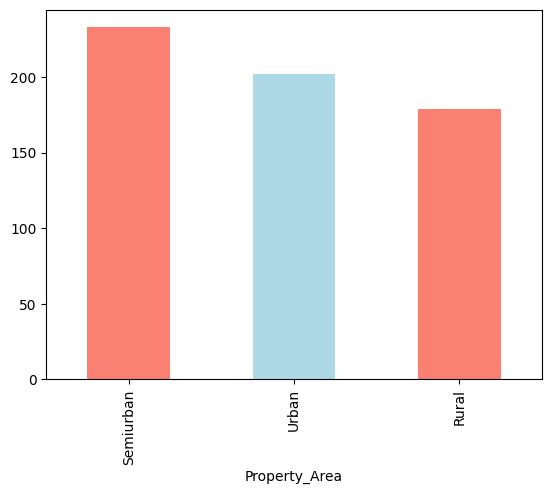

In [19]:
df.Property_Area.value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


what i will do to process the data

drop id

convert gender married education Self_Employed Loan_Status to int

Property_Area dependents one hot encode

gender married Credit_History Loan_Amount_Term Self_Employed replace any missing with mode

LoanAmount ApplicantIncome replace any missing with mean

LoanAmount ApplicantIncome sclae from 0 to 1

In [21]:
pd.crosstab(index=df.Loan_Status, columns=df.Credit_History)

Credit_History,0.0,1.0
Loan_Status,,
N,82,97
Y,7,378


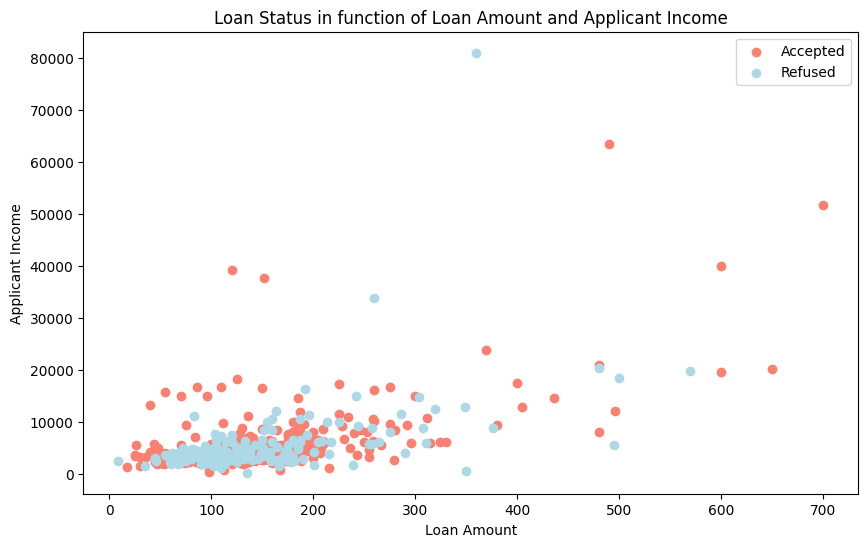

In [22]:
plt.figure(figsize=(10,6))

plt.scatter(df.LoanAmount[df.Loan_Status=="Y"],df.ApplicantIncome[df.Loan_Status=="Y"],c="salmon")
plt.scatter(df.LoanAmount[df.Loan_Status=="N"],df.ApplicantIncome[df.Loan_Status=="N"],c="lightblue")

plt.title("Loan Status in function of Loan Amount and Applicant Income")
plt.xlabel("Loan Amount")
plt.legend(["Accepted", "Refused"])
plt.ylabel("Applicant Income");

In [23]:
df[df["ApplicantIncome"] == 81000]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


I will drop this row as it might confuse the model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [25]:
df = df.drop(df[df["ApplicantIncome"] == 81000].index)
df=df.drop("Loan_ID",axis=1)

In [26]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Married"] = df["Married"].map({"Yes": 1, "No": 0})
df["Education"] = df["Education"].map({"Graduate": 1, "Not Graduate": 0})
df["Self_Employed"] = df["Self_Employed"].map({"Yes": 1, "No": 0})
df["Loan_Status"] = df["Loan_Status"].map({"Y": 1, "N": 0})

In [27]:
#combine two column in one columns
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df = df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)

In [28]:
X=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]


In [29]:
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1.0,0.0,0,1,0.0,NaN,360.0,1.0,Urban,5849.0
1,1.0,1.0,1,1,0.0,128.0,360.0,1.0,Rural,6091.0
2,1.0,1.0,0,1,1.0,66.0,360.0,1.0,Urban,3000.0
3,1.0,1.0,0,0,0.0,120.0,360.0,1.0,Urban,4941.0
4,1.0,0.0,0,1,0.0,141.0,360.0,1.0,Urban,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,71.0,360.0,1.0,Rural,2900.0
610,1.0,1.0,3+,1,0.0,40.0,180.0,1.0,Rural,4106.0
611,1.0,1.0,1,1,0.0,253.0,360.0,1.0,Urban,8312.0
612,1.0,1.0,2,1,0.0,187.0,360.0,1.0,Urban,7583.0


In [30]:
# 1. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# 2. Define columns
# Columns to scale + impute numerically
num_cols = ['TotalIncome', 'LoanAmount']

# Columns to encode + impute
cat_cols = ['Dependents', 'Property_Area']

# Columns to impute only
impute_only_cols = ['Gender', 'Married', 'Self_Employed',
                    'Loan_Amount_Term', 'Credit_History']

# Pipelines

# Numeric pipeline → Impute mean → Scale
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline → Impute mode → OneHot
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Impute-only pipeline
impute_only_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols),
        ('impute_only', impute_only_pipeline, impute_only_cols)
    ])

# 4. Pipeline with model
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# 5. Fit
pipeline.fit(X_train)
X_train_processed = pipeline.transform(X_train)
X_test_processed = pipeline.transform(X_test)

In [32]:
# Get feature names
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)
X_train_df


,num__TotalIncome,num__LoanAmount,cat__Dependents_0,cat__Dependents_1,cat__Dependents_2,cat__Dependents_3+,cat__Property_Area_Rural,cat__Property_Area_Semiurban,cat__Property_Area_Urban,impute_only__Gender,impute_only__Married,impute_only__Self_Employed,impute_only__Loan_Amount_Term,impute_only__Credit_History
0,-0.808772,-1.624212,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,360.0,1.0
1,-0.457633,-0.792670,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,360.0,1.0
2,-0.556472,-0.441315,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,360.0,1.0
3,-0.220246,-0.218790,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,360.0,1.0
4,0.772998,1.619971,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,360.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,-0.570864,-0.593569,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,360.0,1.0
425,0.953856,0.905548,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,360.0,1.0
426,-0.659820,-1.378263,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,360.0,1.0
427,-0.566183,-1.144026,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,360.0,1.0


In [33]:
train_corr_df = X_train_df.copy()
train_corr_df['Loan_Status'] = y_train.values
corr_matrix = train_corr_df.corr()
corr_matrix

,num__TotalIncome,num__LoanAmount,cat__Dependents_0,cat__Dependents_1,cat__Dependents_2,cat__Dependents_3+,cat__Property_Area_Rural,cat__Property_Area_Semiurban,cat__Property_Area_Urban,impute_only__Gender,impute_only__Married,impute_only__Self_Employed,impute_only__Loan_Amount_Term,impute_only__Credit_History,Loan_Status
num__TotalIncome,1.000000,0.622489,-0.080737,0.036941,0.015003,0.077862,-0.015569,-0.037415,0.053425,0.123091,0.124827,0.194927,-0.065830,0.057277,0.023439
num__LoanAmount,0.622489,1.000000,-0.170471,0.080567,0.061647,0.118890,0.040553,-0.021730,-0.016889,0.100986,0.150498,0.206524,0.052687,0.058069,0.016205
cat__Dependents_0,-0.080737,-0.170471,1.000000,-0.560807,-0.523758,-0.342808,0.033698,0.056867,-0.090895,-0.165704,-0.330849,-0.097238,0.129065,-0.031554,-0.029601
cat__Dependents_1,0.036941,0.080567,-0.560807,1.000000,-0.194680,-0.127421,-0.077678,-0.007643,0.082891,0.002268,0.116870,0.082723,-0.105708,0.026890,-0.046684
cat__Dependents_2,0.015003,0.061647,-0.523758,-0.194680,1.000000,-0.119003,-0.033825,-0.034941,0.068525,0.141558,0.233091,0.051582,-0.024050,0.007115,0.060153
cat__Dependents_3+,0.077862,0.118890,-0.342808,-0.127421,-0.119003,1.000000,0.096759,-0.047691,-0.044562,0.112773,0.130284,-0.008713,-0.056298,0.010515,0.040272
cat__Property_Area_Rural,-0.015569,0.040553,0.033698,-0.077678,-0.033825,0.096759,1.000000,-0.497334,-0.455983,0.105221,-0.006969,0.049839,0.019236,-0.001230,-0.104597
cat__Property_Area_Semiurban,-0.037415,-0.021730,0.056867,-0.007643,-0.034941,-0.047691,-0.497334,1.000000,-0.545342,-0.127703,-0.016986,-0.005248,0.063468,0.051764,0.176304
cat__Property_Area_Urban,0.053425,-0.016889,-0.090895,0.082891,0.068525,-0.044562,-0.455983,-0.545342,1.000000,0.029343,0.024159,-0.042770,-0.083693,-0.051915,-0.079802
impute_only__Gender,0.123091,0.100986,-0.165704,0.002268,0.141558,0.112773,0.105221,-0.127703,0.029343,1.000000,0.361682,0.008008,-0.110165,0.056700,0.027492


<Axes: >

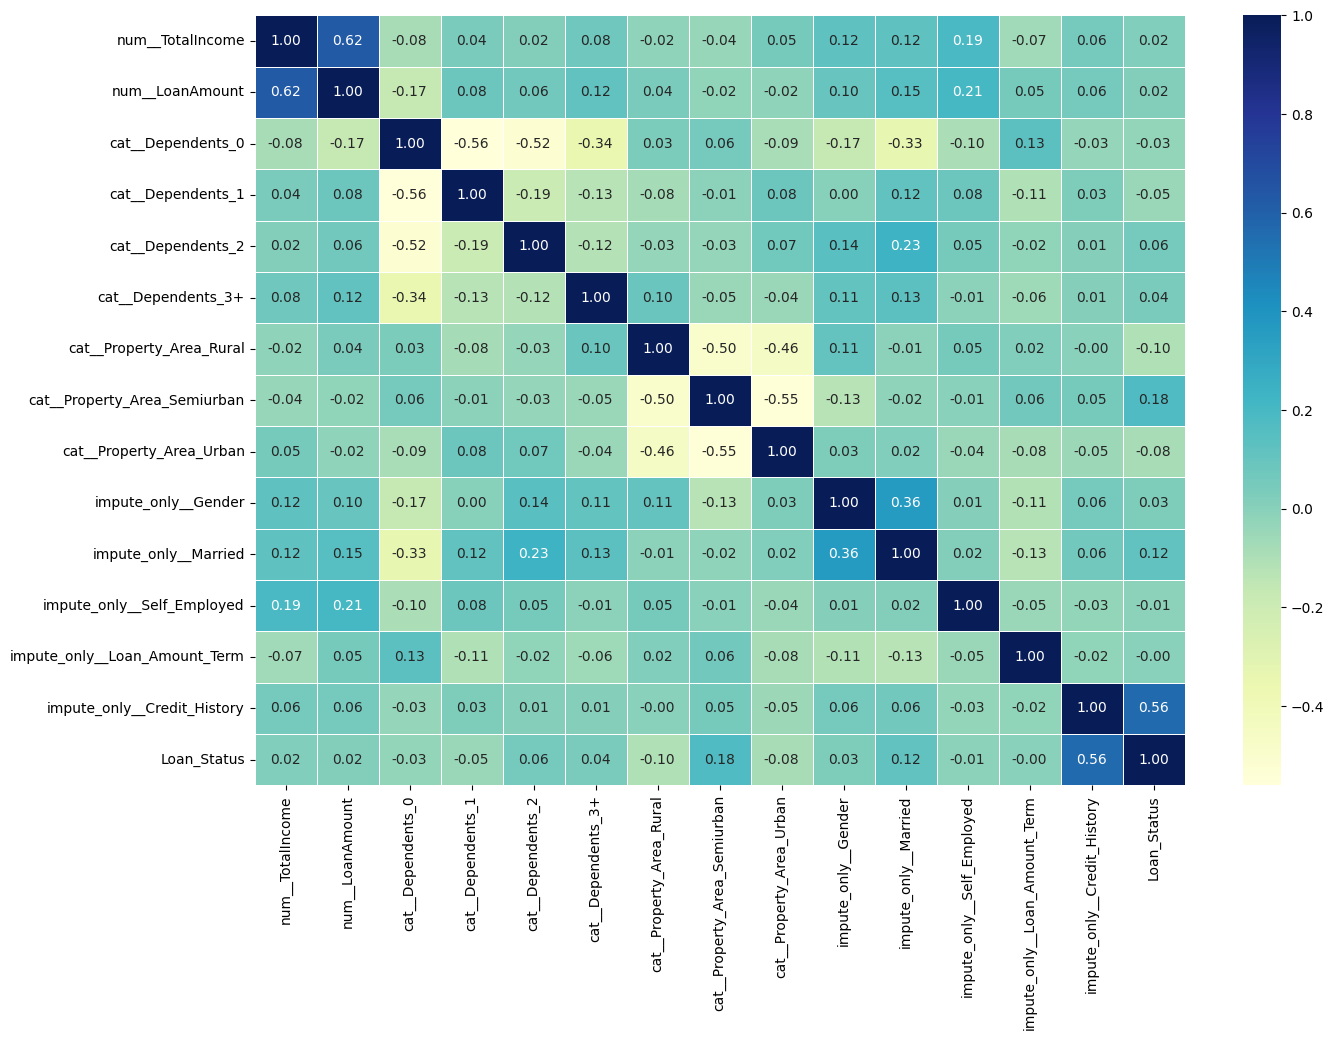

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt= ".2f",
           cmap="YlGnBu")

## 1. Feature Importance with Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_processed, y_train)  # only fitting to get importance scores

RandomForestClassifier(random_state=42)

In [36]:
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n=== Random Forest Feature Importances ===")
print(feature_importances)


=== Random Forest Feature Importances ===
                          Feature  Importance
13    impute_only__Credit_History    0.265555
0                num__TotalIncome    0.261960
1                 num__LoanAmount    0.220887
12  impute_only__Loan_Amount_Term    0.048482
10           impute_only__Married    0.031976
9             impute_only__Gender    0.025431
7    cat__Property_Area_Semiurban    0.025033
6        cat__Property_Area_Rural    0.022189
11     impute_only__Self_Employed    0.021608
2               cat__Dependents_0    0.019238
8        cat__Property_Area_Urban    0.016105
4               cat__Dependents_2    0.015998
3               cat__Dependents_1    0.015492
5              cat__Dependents_3+    0.010045


In [37]:
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression

# Using Logistic Regression here just for ranking purposes
lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=13)  # How many features to keep
rfe.fit(X_train_processed, y_train)

# Get the mask of selected features
selected_features_rfe = feature_names[rfe.support_]
print("\n=== RFE Selected Features ===")
print(selected_features_rfe)


=== RFE Selected Features ===
['num__TotalIncome' 'num__LoanAmount' 'cat__Dependents_0'
 'cat__Dependents_1' 'cat__Dependents_2' 'cat__Dependents_3+'
 'cat__Property_Area_Rural' 'cat__Property_Area_Semiurban'
 'cat__Property_Area_Urban' 'impute_only__Gender' 'impute_only__Married'
 'impute_only__Self_Employed' 'impute_only__Credit_History']


In [38]:
from sklearn.preprocessing import MinMaxScaler
# Chi-square works only with non-negative features and we used standard scale so i will scale it to minmaxscalar

X_chi = X_train_processed.copy()
# MinMax scale to [0,1] so Chi-square works
scaler = MinMaxScaler()
X_chi_scaled = scaler.fit_transform(X_chi)

# Chi-square test
chi_scores, p_values = chi2(X_chi_scaled, y_train)

# Put into a dataframe with feature names
chi2_df = pd.DataFrame({
    'Feature': feature_names,
    'Chi2 Score': chi_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(chi2_df)

                          Feature    Chi2 Score   p-value
13    impute_only__Credit_History  1.923106e+01  0.000012
7    cat__Property_Area_Semiurban  8.361332e+00  0.003833
6        cat__Property_Area_Rural  3.315008e+00  0.068650
10           impute_only__Married  2.108898e+00  0.146445
8        cat__Property_Area_Urban  1.821368e+00  0.177150
4               cat__Dependents_2  1.313487e+00  0.251764
3               cat__Dependents_1  7.736931e-01  0.379077
5              cat__Dependents_3+  6.454873e-01  0.421731
2               cat__Dependents_0  1.498311e-01  0.698697
9             impute_only__Gender  6.197604e-02  0.803400
0                num__TotalIncome  2.261397e-02  0.880465
11     impute_only__Self_Employed  2.161579e-02  0.883114
1                 num__LoanAmount  8.570894e-03  0.926238
12  impute_only__Loan_Amount_Term  5.715431e-09  0.999940


After tring all of these tests to feature selection it is not clear to remove any feature  

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [40]:
model=LogisticRegression(penalty='l2',max_iter=10000,random_state=42)
model.fit(X_train_processed,y_train)
y_pred = model.predict(X_test_processed)
accuracy_score(y_test, y_pred)

0.7663043478260869

In [41]:
model=LogisticRegression(penalty='l1',max_iter=10000,random_state=42,solver='saga')
model.fit(X_train_processed,y_train)
y_pred = model.predict(X_test_processed)
accuracy_score(y_test, y_pred)

0.7336956521739131

In [42]:
model=DecisionTreeClassifier(criterion='gini',random_state=42,min_samples_split=8)
model.fit(X_train_processed,y_train)
y_pred = model.predict(X_test_processed)
accuracy_score(y_test, y_pred)

0.7010869565217391

In [43]:
model=DecisionTreeClassifier(criterion='entropy',random_state=42,min_samples_leaf=5,max_depth=10)
model.fit(X_train_processed,y_train)
y_pred = model.predict(X_test_processed)
accuracy_score(y_test, y_pred)

0.7336956521739131

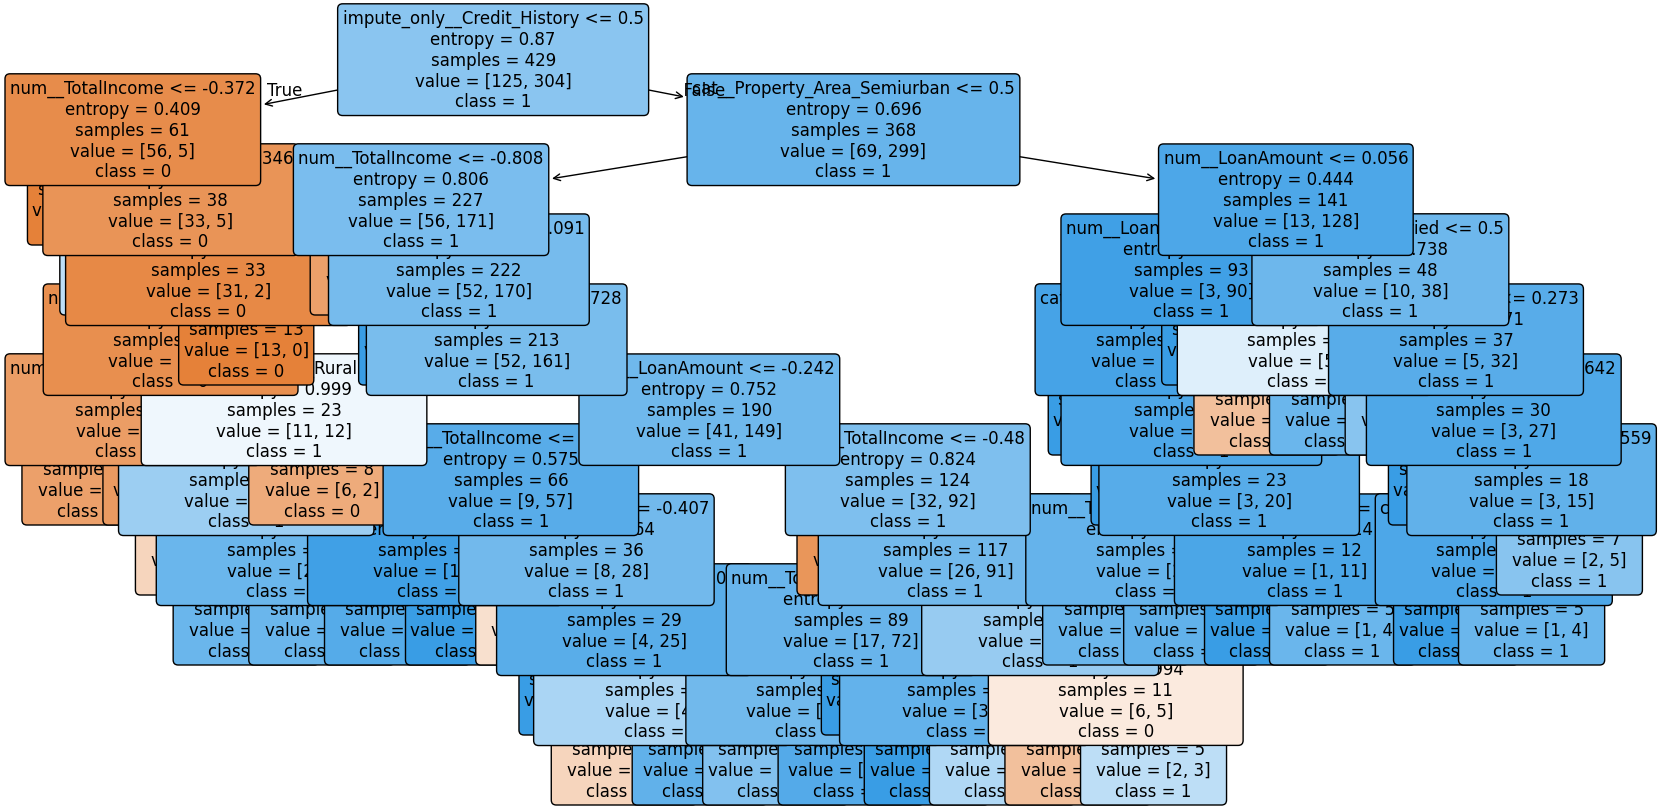

In [44]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=feature_names,  # or processed feature names
          class_names=['0', '1'],      # your target classes
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()

In [45]:
model=RandomForestClassifier(n_estimators=800,max_depth=10,random_state=42)
model.fit(X_train_processed,y_train)
y_pred = model.predict(X_test_processed)
accuracy_score(y_test, y_pred)

0.7771739130434783

In [46]:
model=AdaBoostClassifier(random_state=42)
model.fit(X_train_processed,y_train)
y_pred = model.predict(X_test_processed)
accuracy_score(y_test, y_pred)

0.7717391304347826

Now i will start using GridSearch

In [47]:
from sklearn.model_selection import GridSearchCV


# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear","saga"],
                "max_iter": [100, 500, 1000],
                "penalty":['l1','l2','elasticnet'],
                'l1_ratio':[0.2,0.4,0.6,0.8],
                "random_state": [42]}



# Different DecisionTree hyperparameters
dtree_grid={"criterion": ["gini", "entropy", "log_loss"],
            "max_depth": [None, 3, 5, 10, 20],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2),
            "max_features": [None, "sqrt", "log2"],
            "splitter": ["best", "random"],
            "random_state": [42]}


# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": [100,300,500,800,1100],
           "max_depth": [None, 5, 10],
           "min_samples_split": [2,5,10],
           "min_samples_leaf": [1,2,4],
           "max_features": ["sqrt", "log2"],
           "bootstrap": [True],
           "random_state": [42]}

# Different AdaBoostClassifier hyperparameters
adaboost_grid = {
    "n_estimators": [50, 100, 200, 500],
    "learning_rate": [0.01, 0.1, 0.5, 1.0],
    "estimator": [  # changed from base_estimator
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3)
    ],
    "algorithm": ["SAMME", "SAMME.R"],
    "random_state": [42]
}

In [ ]:
logreg_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on processed training data
logreg_search.fit(X_train_processed, y_train)

# Check best parameters & score
print(logreg_search.best_params_)
print(logreg_search.best_score_)

{'C': np.float64(0.08858667904100823), 'l1_ratio': 0.2, 'max_iter': 100, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}
0.8274692202462381


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1200 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_

In [ ]:
dt_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=dtree_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on processed training data

dt_search.fit(X_train_processed, y_train)

# Check best parameters & score
print(dt_search.best_params_)
print(dt_search.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2), 'random_state': 42, 'splitter': 'best'}
0.8345006839945281


In [ ]:
rf_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on processed training data
rf_search.fit(X_train_processed, y_train)

# Check best parameters & score
print(rf_search.best_params_)
print(rf_search.best_score_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
0.8321751025991793


In [ ]:
adaboost_search = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid=adaboost_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on processed training data
adaboost_search.fit(X_train_processed, y_train)

# Check best parameters & score
print(adaboost_search.best_params_)
print(adaboost_search.best_score_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

{'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.01, 'n_estimators': 200, 'random_state': 42}
0.8345006839945281


In [48]:
model_1=LogisticRegression(C=np.float64(0.08858667904100823),
                           l1_ratio=0.2,
                           solver="liblinear",
                           random_state=42,
                           max_iter=100,
                           penalty="l1"
                           )
model_1.fit(X_train_processed,y_train)

model_2=DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 3,
 max_features= None,
 min_samples_leaf= np.int64(1),
 min_samples_split= np.int64(2),
 random_state= 42,
 splitter= 'best')
model_2.fit(X_train_processed,y_train)

model_3=RandomForestClassifier(n_estimators=100,
                               random_state=42,
                               max_depth=10,
                               min_samples_split=2,
                               min_samples_leaf=4,
                               max_features="sqrt",
                               bootstrap=True)
model_3.fit(X_train_processed,y_train)


model_4=AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.01,
    estimator=DecisionTreeClassifier(max_depth=3),
    algorithm="SAMME",
    random_state=42
)
model_4.fit(X_train_processed,y_train)


models={"model_1": [model_1,X_test_processed],
       "model_2": [model_2,X_test_processed],
       "model_3": [model_3,X_test_processed],
       "model_4": [model_4,X_test_processed]}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


In [49]:
def fit_and_score(models,y_test):
    np.random.seed(42)
    results=[]

    for model_name,(model, X_test) in models.items():
            y_pred = model.predict(X_test)

            results.append({
                "Model": model_name,
                "accuracy": accuracy_score(y_test, y_pred),
                "precision": precision_score(y_test, y_pred),
                "recall": recall_score(y_test, y_pred),
                "f1": f1_score(y_test, y_pred),
                "AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
            })
    df_scores = pd.DataFrame(results)
    return df_scores

In [50]:
df_scores = fit_and_score(models=models,
                             y_test=y_test)
df_scores

,Model,accuracy,precision,recall,f1,AUC
0,model_1,0.766304,0.738854,0.983051,0.843636,0.724448
1,model_2,0.766304,0.738854,0.983051,0.843636,0.691513
2,model_3,0.771739,0.743590,0.983051,0.846715,0.731574
3,model_4,0.766304,0.738854,0.983051,0.843636,0.702427


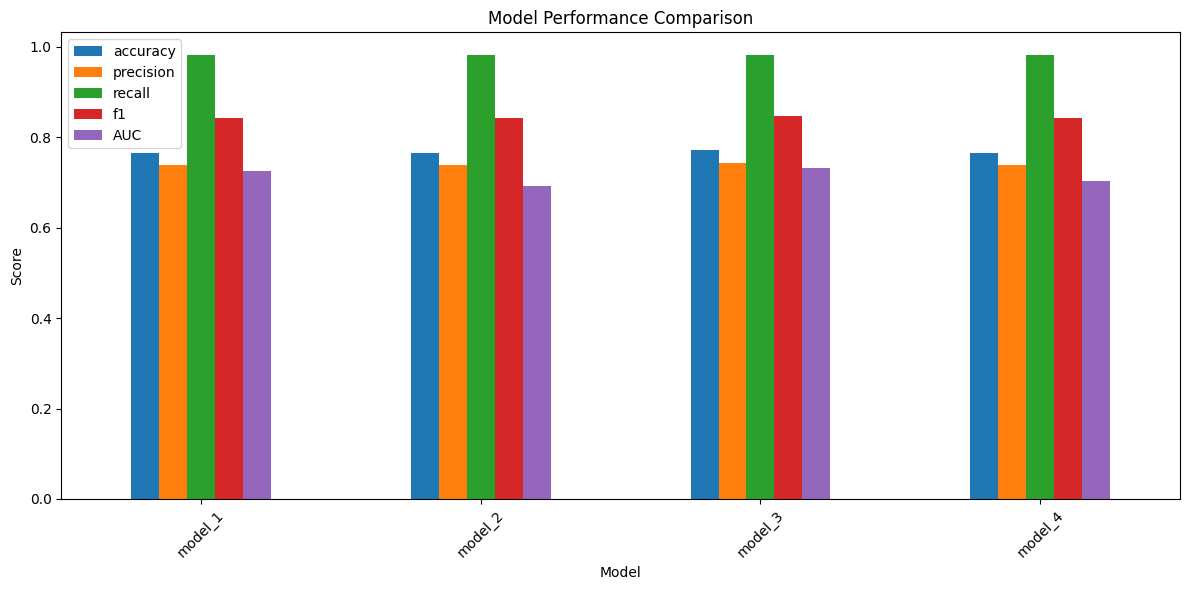

In [51]:
df_scores.set_index("Model")[["accuracy", "precision", "recall", "f1", "AUC"]].plot(
    kind="bar",
    figsize=(12,6),
    xlabel="Model",
    ylabel="Score",
    title="Model Performance Comparison"
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The best model is clearly model 3

# Effect of Regularization

### Logistic Regression
* **Smaller C** shrinks coefficients $\rightarrow$ reduces overfitting.
* **L1 Regularization** removes weak features (creates a sparse solution).
* **L2 Regularization** smooths coefficients.

### Decision Trees
* **Depth limits** prevent memorizing training data.
* Creates more stable and interpretable trees.

### Random Forest
* `min_samples_leaf` and `max_depth` reduce variance.
* Prevents overfitting, which is common in large forests.

### AdaBoost
* **Smaller learning rate** = softer boosting.
* Restricts overfitting by slowing down weight updates.

---

# When is Logistic Regression Preferable?

Logistic Regression is the best choice when:

### We want interpretability
Coefficients clearly show feature importance and directional relationships.

### Data is linearly separable or approximately linear
It creates stable linear decision boundaries which map well to linear data.

### Dataset is small to medium
Complex models like trees may overfit small datasets, whereas Logistic Regression remains stable.

### We want a strong baseline
Logistic Regression is reliable, computationally cheap, and fast to train.